# Implementing Analysis and modelling on Bike Sharing Dataset

In [30]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

In [3]:
# This library is to display tabular data in a visually appealying format

!pip install prettytable

In [4]:
from prettytable import PrettyTable

In [5]:
import random

%matplotlib inline
random.seed(100)


# Creating a class DATALOADER to initialize the header and data

In [6]:


class Dataloader():
    
    def __init__(self, csv_path):
        self.csv_path = csv_path
        self.data = pd.read_csv(csv_path)
        self.data.sample(frac=1.0, replace=True, random_state=1)
    
#To get the coloumn names of the dataset
    def getHeader(self):
        return list(self.data.column.values)

#To get the training, validation and test data for modelling
    def getData(self):
        split_train = int(60/100 * len(self.data))
        split_test = int(80/100 * len(self.data))
        
#Creating the train, validation and test dataset
        train = self.data[: split_train]
        val = self.data[split_train: split_test]
        test = self.data[split_test:]
        return train, val, test
        
    def getFullData(self):
        return self.data

        

    

# Creating training, Validation, and Test dataset using DATALOADER method

In [10]:
dataloader = Dataloader(r'C:/Users/pbhal/Downloads/hour.csv/hour.csv')
train, val, test = dataloader.getData()
fullData = dataloader.getFullData()

category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features
target = ['cnt']

In [11]:
#Printing out the coloumn names
print(list(fullData.columns))

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [12]:
#Printig the dataset
fullData.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
print(fullData[number_features].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [14]:
#Treating variables in category_features list as a category variable

for col in category_features:
    fullData[col] = fullData[col].astype('category')
print(fullData[category_features].describe())
    

        season  holiday   mnth     hr  weekday  workingday  weathersit
count    17379    17379  17379  17379    17379       17379       17379
unique       4        2     12     24        7           2           4
top          3        0      5     17        6           1           1
freq      4496    16879   1488    730     2512       11865       11413


# Checking Missing Values

In [15]:
fullData.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

# Outlier Analysis using visualisation

# Box Plot

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

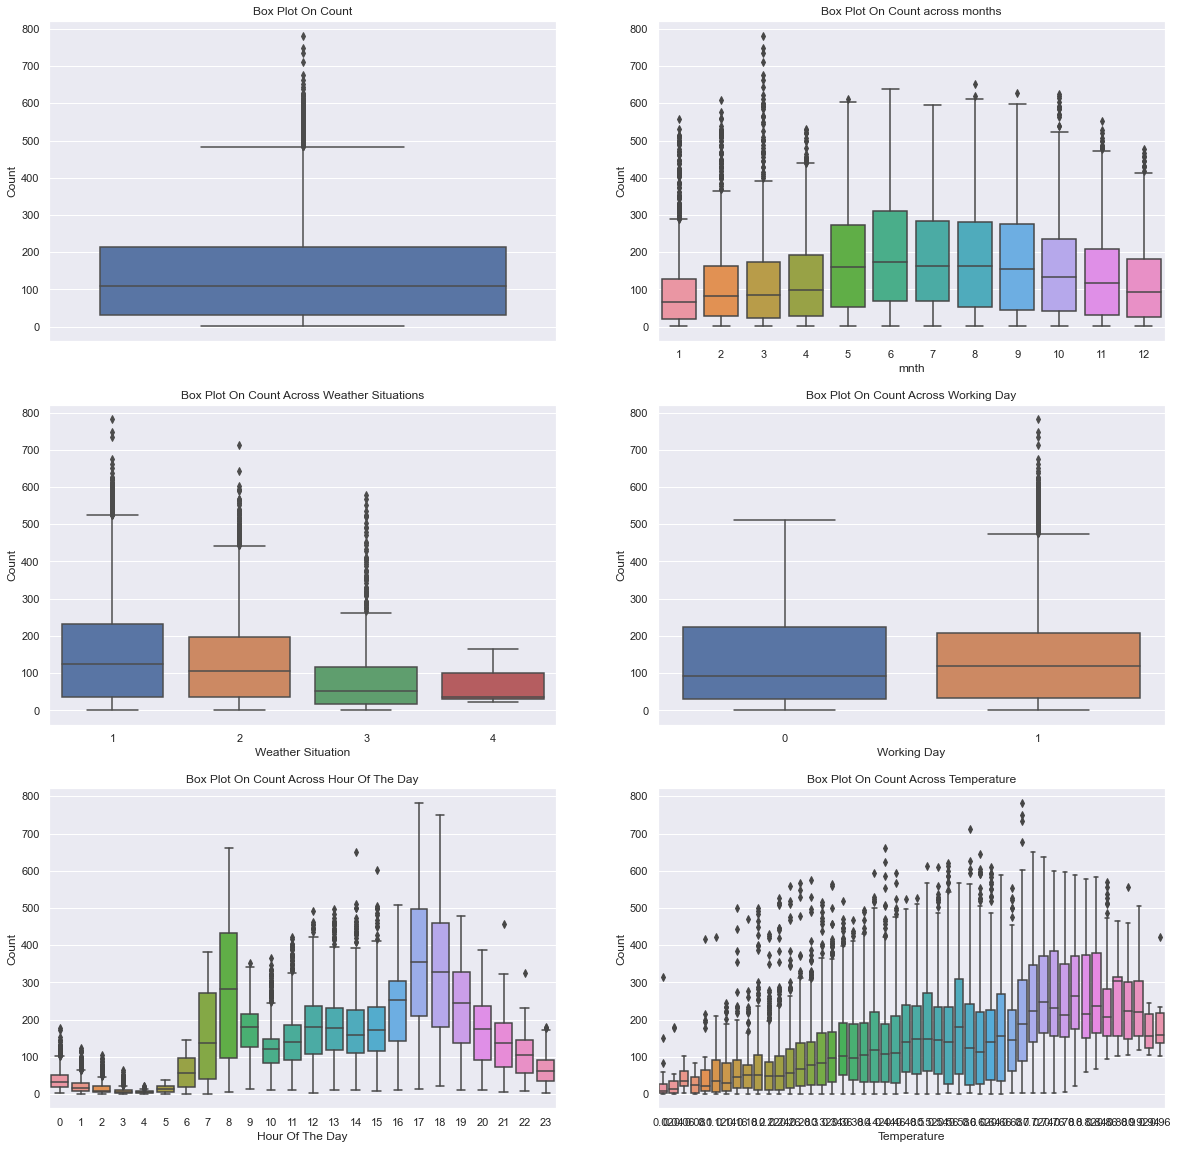

In [16]:
sns.set(font_scale = 1.0)
fig , axes = plt.subplots(nrows= 3, ncols=2)
fig.set_size_inches(20,20)
sns.boxplot(data=train, y='cnt', orient='v', ax= axes[0][0])
sns.boxplot(data= train, y= 'cnt', x= 'mnth', orient='v', ax= axes[0][1])
sns.boxplot(data=train,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="cnt",x="temp",orient="v",ax=axes[2][1])


axes[0][0].set(ylabel='Count',title="Box Plot On Count");
axes[0][1].set(ylabel='Count',title="Box Plot On Count across months");
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

C:\Users\pbhal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

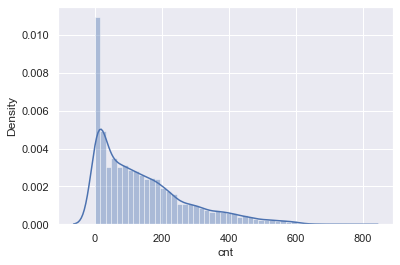

In [17]:
# Removing outliers from data
sns.distplot(train[target[-1]])

Samples in the train dataset with outliers: 10427
samples in the train dataset without outliers: 10151


C:\Users\pbhal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

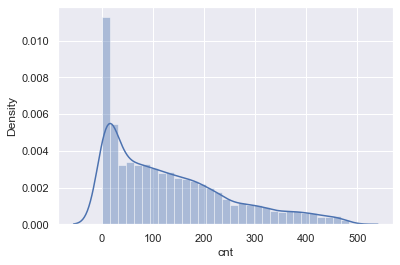

In [18]:
print("Samples in the train dataset with outliers: {}".format(len(train)))
q1 = train.cnt.quantile(0.25)
q3 = train.cnt.quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

processed_trainedData= train.loc[(train.cnt >= lower_bound) & (train.cnt <= upper_bound)]
print ("samples in the train dataset without outliers: {}".format(len(processed_trainedData)))

sns.distplot(processed_trainedData[target[-1]])

# Correaltion matrix

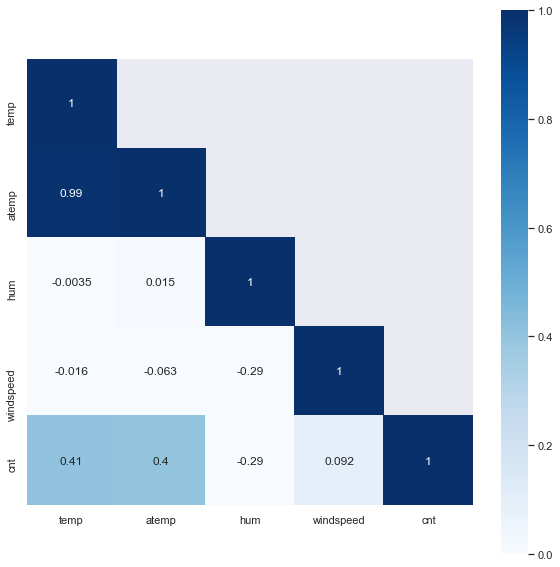

In [21]:
matrix = train[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)]= False
fig, ax= plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale = 1.0)
sns.heatmap(matrix, annot=True, mask=heat,vmax=1.0, vmin=0.0, square=True, cmap="Blues");

In [22]:
features.remove('atemp')

In [23]:
print(list(features))

['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']


In [46]:
X_train = processed_trainedData[features].values
Y_train = processed_trainedData[target].values.ravel()

#sort the validation set values
val = val.sort_values(by = target)
x_val = val[features].values
y_val = val[target].values.ravel()

x_test = test[features].values

#Creating a table using prettytable library
table = PrettyTable()
table.field_names = ['Model', 'MSE', 'R-Square value']

#Creating a model
models = [
    SGDRegressor(max_iter =1000, tol= 1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=0.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(),max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor(random_state=0, n_estimators =300)
]

for model in models:
    model.fit(X_train, Y_train)
    y_res = model.predict(x_val)
    
    mse = mean_squared_error(y_val,y_res)
    score = model.score(x_val, y_val)
    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

+-----------------------+----------+----------------+
|         Model         |   MSE    | R-Square value |
+-----------------------+----------+----------------+
|      SGDRegressor     | 41706.86 |      0.10      |
|         Lasso         | 43103.36 |      0.07      |
|       ElasticNet      | 54155.92 |     -0.17      |
|         Ridge         | 42963.88 |      0.07      |
|          SVR          | 50794.91 |     -0.09      |
|          SVR          | 41659.68 |      0.10      |
|    BaggingRegressor   | 19631.50 |      0.58      |
|    BaggingRegressor   | 45447.38 |      0.02      |
|         NuSVR         | 41517.67 |      0.11      |
| RandomForestRegressor | 18949.93 |      0.59      |
+-----------------------+----------+----------------+


# Implementing Random Forest Regression technique as it has highest R-Square value among other modelling method

In [49]:
#Creating a table to display output values 
table = PrettyTable()
table.field_names = ['Model','Dataset', 'MSE', 'MAE','RMSLE','R-Square value']

model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                             max_features='auto', max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=4,
                             min_weight_fraction_leaf=0.0, n_estimators= 200, n_jobs=None,
                             oob_score=False, random_state=None, verbose=0,warm_start=False)
model.fit(X_train, Y_train)

def evaluate(x,y,dataset):
    pred =model.predict(x)
    mse = mean_squared_error(y,pred)
    mae = mean_absolute_error(y,pred)
    score = model.score(x,y)
    rmsle = np.sqrt(mean_squared_log_error(y, pred))
    
    table.add_row([type(model),__name__, format(mse, '.2f'), format(mae, '.2f'), format(score,'.2f'), format(rmsle,'.2f')])
    
evaluate(X_train,Y_train,'training')
evaluate(x_val,y_val,'validation')

print(table)



+----------------------------------------------------------+----------+----------+-------+-------+----------------+
|                          Model                           | Dataset  |   MSE    |  MAE  | RMSLE | R-Square value |
+----------------------------------------------------------+----------+----------+-------+-------+----------------+
| <class 'sklearn.ensemble._forest.RandomForestRegressor'> | __main__ |  297.41  | 10.89 |  0.98 |      0.21      |
| <class 'sklearn.ensemble._forest.RandomForestRegressor'> | __main__ | 19022.56 | 96.56 |  0.59 |      0.48      |
+----------------------------------------------------------+----------+----------+-------+-------+----------------+


In [58]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

table = PrettyTable()
table.field_names = ['Feature', 'Importance']

print("Feature ranking:")

for f in range(x_val.shape[1]):
    table.add_row([features[indices[f]], format(importances[indices[f]], '.3f')])
print(table)
    
  #  print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
+------------+------------+
|  Feature   | Importance |
+------------+------------+
|     hr     |   0.634    |
|    temp    |   0.159    |
|    hum     |   0.050    |
| workingday |   0.047    |
| windspeed  |   0.026    |
| weathersit |   0.026    |
|  weekday   |   0.020    |
|    mnth    |   0.020    |
|   season   |   0.013    |
|  holiday   |   0.003    |
+------------+------------+


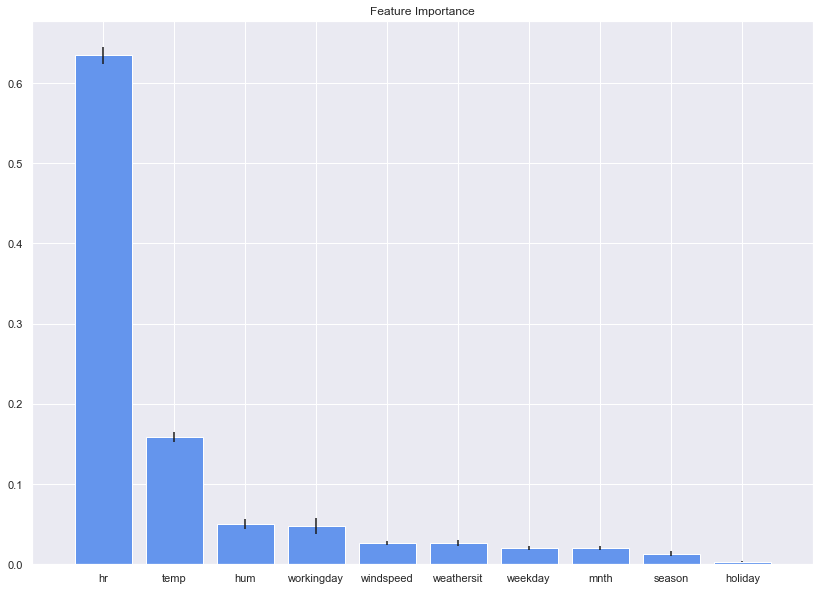

In [59]:
plt.figure(figsize=(14,10))
plt.title("Feature Importance")
plt.bar(range(x_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_val.shape[1]])
plt.show()